In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Exploring data to gain understanding and define objective of studies

In [32]:
df = pd.read_excel('Dry_Bean_Dataset.xlsx', sheet_name='Dry_Beans_Dataset')
df.head()


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [33]:
df.info() #no missing values. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [34]:
df.describe()  # some features are on scales with several orders of magnitude bigger than others. feature scaling 

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [35]:
df.describe(include='object')

,Class
count,13611
unique,7
top,DERMASON
freq,3546


In [36]:
df.Class.unique()  #target variable

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [37]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [38]:
# checking dataset imbalance 
relative_freq = df.Class.value_counts(normalize=True)

<Axes: >

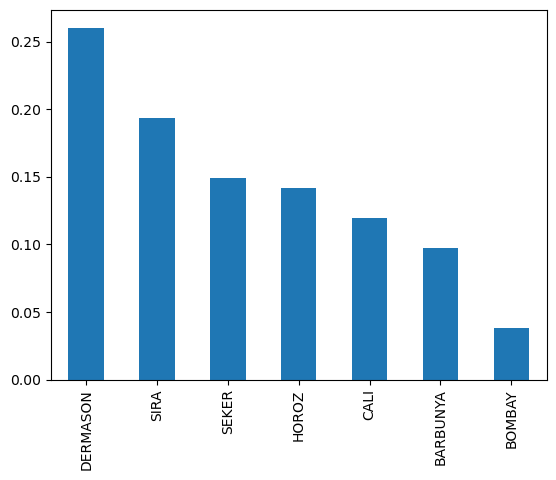

In [39]:
relative_freq.plot(kind='bar') # class distribution skewed. may need to address class imbalance to improve model
                                # accuracy and generalization on new instances. 

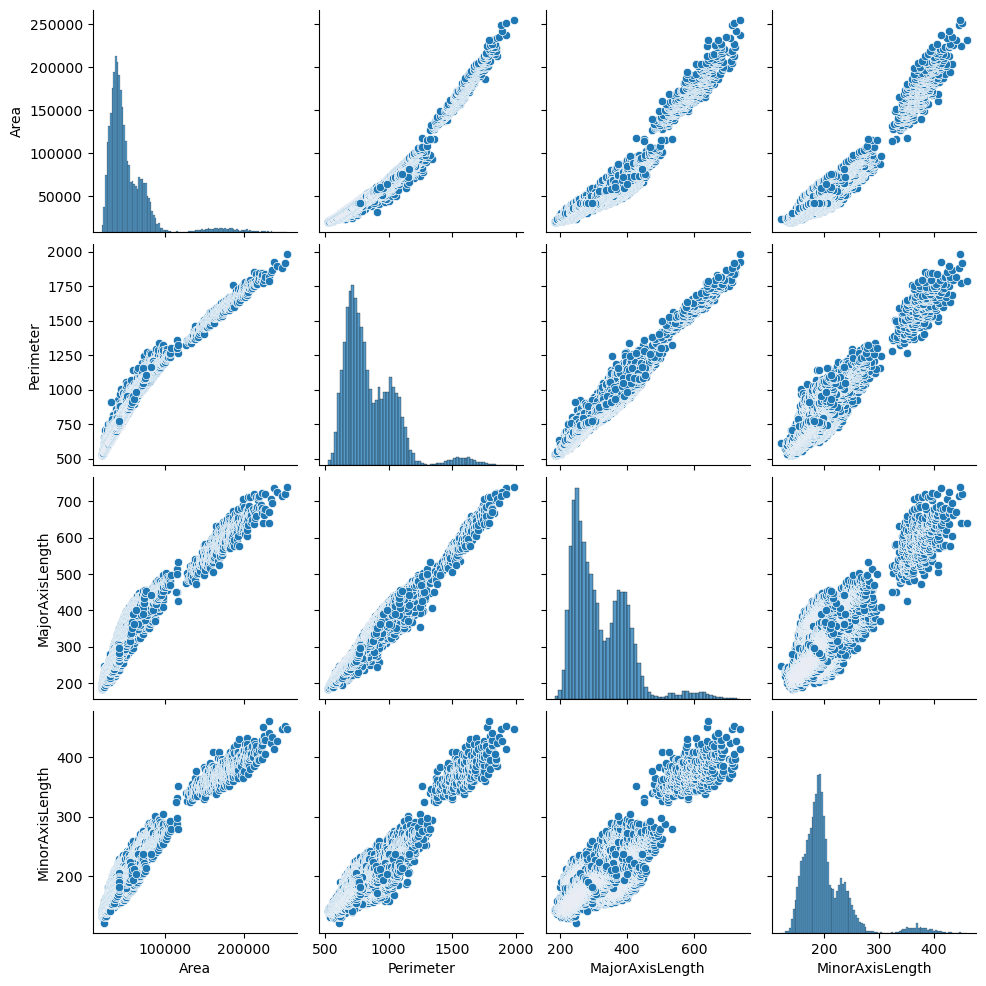

In [53]:
features = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength']
sns.pairplot(df[features])  #clearly there exists linear correlation between some features. 
                            # we should consider feature reduction. 

### DATA UNDERSTANDING
Data Set Name:
Dry Bean Dataset

Abstract:
Images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. A total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.

Data Type:  Multivariate

Attribute Type: Categorical, Integer, Real

Format Type: Matrix

Number of Instances (records in your data set): 
13611

Number of Attributes (fields within each record): 
17


### MAIN ANALYSIS TASK: TRAIN A CLASSIFICATION MODEL TO CLASSIFY DRY BEANS. 

In [40]:
%pip install imbalanced-learn

In [41]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

In [42]:
#we split data to before balancing data to prevent data leakage.
X = df.drop('Class', axis=1) #features
y = df['Class'].copy()  # target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [43]:
imbalanced_train_set = pd.concat([X_train, y_train], axis=1)
imbalanced_train_set.shape

(9527, 17)

<Axes: >

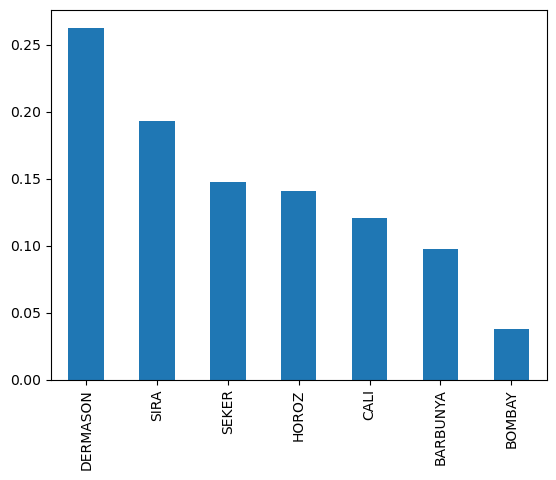

In [44]:
y_train.value_counts(normalize=True).plot(kind='bar')

<Axes: >

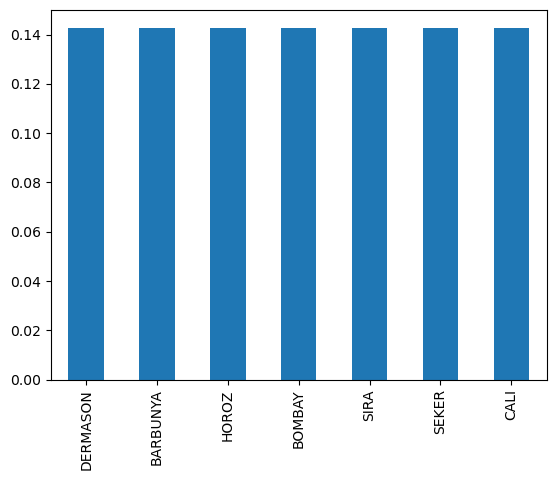

In [45]:
oversmapler = RandomOverSampler() # create an instance

X_train_resampled, y_train_resampled = oversmapler.fit_resample(X_train, y_train) #resample train dataset

balanced_train_set = pd.concat([X_train_resampled, y_train_resampled], axis=1)
y_train_resampled.value_counts(normalize=True).plot(kind='bar')

In [46]:
balanced_train_set.shape # small classes oversampled. instances increased. 

(17521, 17)

In [47]:
X_train_resampled.describe() # features have varying scales

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,17521.000000,17521.000000,17521.000000,17521.000000,17521.000000,17521.000000,17521.000000,17521.000000,17521.000000,17521.000000,17521.000000,17521.000000,17521.000000,17521.000000,17521.000000,17521.000000
mean,70068.129673,972.417077,363.831180,227.750088,1.600718,0.756874,71044.658296,286.223380,0.752121,0.986644,0.862890,0.795192,0.006008,0.001538,0.636150,0.994379
std,46299.859316,297.651210,115.676049,66.799191,0.246493,0.092134,46958.873374,85.382119,0.049455,0.005080,0.059895,0.061809,0.001372,0.000621,0.099194,0.004726
min,20420.000000,524.932000,183.601165,129.576207,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.645368,0.002778,0.000567,0.416499,0.947687
25%,40253.000000,742.992000,269.060328,184.811209,1.449455,0.723891,40691.000000,226.388408,0.721399,0.984591,0.820540,0.756755,0.005271,0.001028,0.572677,0.992546
50%,53508.000000,913.614000,351.924015,203.345697,1.579644,0.774108,54215.000000,261.014370,0.762506,0.987906,0.865467,0.793657,0.006287,0.001376,0.629892,0.995685
75%,75820.000000,1078.140000,408.417550,243.246494,1.731940,0.816471,77076.000000,310.704075,0.788931,0.989945,0.906262,0.828935,0.006925,0.001991,0.687134,0.997629
max,254616.000000,1985.370000,738.860153,460.198497,2.388873,0.908167,263261.000000,569.374358,0.866195,0.994677,0.986812,0.987303,0.009897,0.003665,0.974767,0.999709


In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_resampled_scaled = pd.DataFrame(scaler.fit_transform(X_train_resampled), 
                                        columns=X_train_resampled.columns)
X_train_resampled_scaled.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,-0.860894,-1.079224,-0.942581,-1.143200,0.334226,0.515419,-0.863283,-1.055281,0.737803,0.712744,0.540132,-0.412181,1.768664,0.464142,-0.440438,0.591571
1,-0.930464,-1.239644,-1.336484,-0.939880,-1.348466,-1.538595,-0.929684,-1.181189,-0.550700,-0.245758,1.143273,1.468477,1.271676,2.268209,1.499785,0.245538
2,0.203891,0.497018,0.403212,0.307743,0.212455,0.427703,0.206215,0.374182,-0.914650,-0.345777,-1.116840,-0.324512,-0.616690,-0.625592,-0.356046,-0.243155
3,-0.489737,-0.310141,0.014775,-0.928161,2.453014,1.458914,-0.489030,-0.475211,-2.572122,-0.183547,-1.569488,-1.992858,1.242617,-0.914402,-1.860464,0.334169
4,1.625772,1.657494,1.551163,1.717415,-0.058492,0.210550,1.622984,1.686029,-1.135678,0.066514,-0.213634,-0.054165,-1.655491,-1.017222,-0.092077,0.054776


#### Model selection. 
We follow suggestion from sklearn's "choosing the right estimator" flowchart. [see here](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

Text(0.5, 1.0, 'n_components vs PVE')

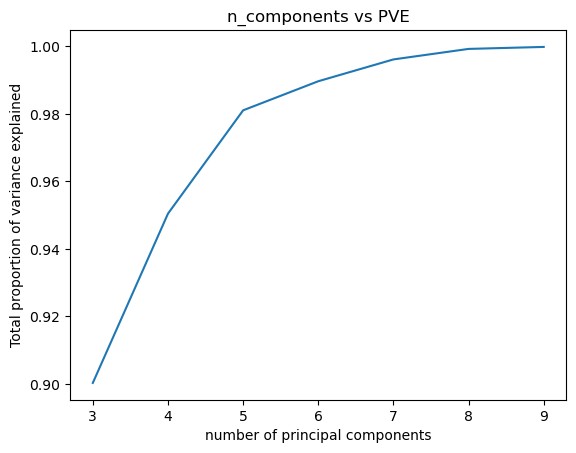

In [56]:
from sklearn.decomposition import PCA
PVE = []

for n_components in range(3, 10 ):
    pca = PCA(n_components=n_components)
    X_train_transformed = pca.fit_transform(X_train_resampled_scaled)
    explained_var_ratio = pca.explained_variance_ratio_
    PVE.append(explained_var_ratio.sum())

sns.lineplot(x=list(range(3,10)), y=PVE)
plt.xlabel('number of principal components')
plt.ylabel('Total proportion of variance explained')
plt.title('n_components vs PVE')

In [ ]:
pca = PCA(n_components=5)   # 5 principal components explains about 95% of variation. 
X_train_transformed = pca.fit_transform(X_train_resampled_scaled)

In [57]:
X_train_transformed

array([[-2.37538741,  1.72572052, -1.1416126 , ...,  0.10805965,
         0.22566418,  0.15453044],
       [-4.5480721 , -0.88920149,  1.29919866, ...,  0.49513471,
         0.09224179, -0.21031258],
       [ 1.58010977,  0.58368205,  0.33809906, ..., -0.11581504,
         0.2227077 , -0.0884194 ],
       ...,
       [-2.32688907, -1.49842951, -0.28587548, ..., -0.23090237,
         0.0287903 ,  0.01742346],
       [ 0.13443079,  1.70354837,  0.28050299, ...,  0.0664744 ,
         0.27696014,  0.06553188],
       [-0.07639079,  2.08581293, -0.20912316, ..., -0.09444614,
         0.17120418,  0.03657493]])

In [59]:
from sklearn.svm import LinearSVC  
from sklearn.model_selection import cross_val_score, cross_val_predict

lin_svc = LinearSVC(max_iter=10000) 

In [60]:
cross_val_score(lin_svc,        
                X_train_transformed, 
                y_train_resampled, cv=5, scoring='accuracy')

array([0.93095578, 0.92950913, 0.92836758, 0.91894977, 0.92979452])

LinearSVC uses one-vrs-rest scheme: few classifier, large dataset

one-vrs-one scheme: many classifiers, reduced dataset. 

In [61]:
from sklearn.multiclass import OneVsOneClassifier, 

ovo_lin_svc = OneVsOneClassifier(LinearSVC(max_iter=10000))

In [62]:
cross_val_score(ovo_lin_svc,  #much faster to train since data is reduced. 
                X_train_transformed, 
                y_train_resampled, cv=5, scoring='accuracy')

array([0.9360913 , 0.93493151, 0.93350457, 0.92751142, 0.93550228])

In [72]:
from sklearn.metrics import confusion_matrix
y_hat_train = cross_val_predict(ovo_lin_svc, 
                                X_train_transformed, 
                                y_train_resampled, cv=5)
  # little hard to see what's going on. let's visualize

In [74]:
from sklearn.utils.multiclass import unique_labels

class_names = unique_labels(y_train_resampled, y_hat_train) 
class_names


array(['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'],
      dtype='<U8')

In [75]:
conf_mat = confusion_matrix(y_train_resampled, 
                            y_hat_train, 
                            labels=class_names) # Label the confusion matrix
cm_df = pd.DataFrame(conf_mat, index=class_names, columns=class_names)
cm_df

,BARBUNYA,BOMBAY,CALI,DERMASON,HOROZ,SEKER,SIRA
BARBUNYA,2304,0,130,0,7,16,46
BOMBAY,0,2503,0,0,0,0,0
CALI,76,0,2373,0,36,1,17
DERMASON,3,0,0,2236,4,45,215
HOROZ,5,0,43,18,2381,0,56
SEKER,22,0,0,35,3,2365,78
SIRA,16,0,5,195,46,47,2194


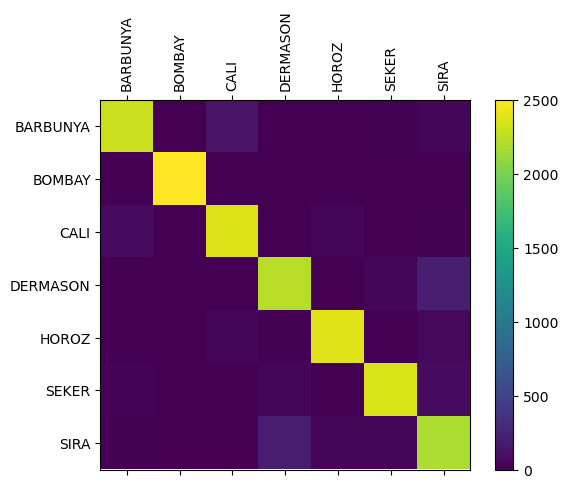

In [80]:
fig, ax = plt.subplots()

mat = ax.matshow(conf_mat)

#set tick positions
xticks_positions = np.arange(len(class_names))
yticks_positions = np.arange(len(class_names))

# set tick labels
ax.set_xticks(xticks_positions)
ax.set_yticks(yticks_positions)

# set tick labels using fixedlocator and fixedformater
ax.set_xticklabels(class_names, rotation=90)
ax.set_yticklabels(class_names)

plt.colorbar(mat)
plt.show()


This classifier is somewhat "confused". The pairs of classes (`CALI` and `BERBUNYA`) AND (`SIRA` and `DERMASON`) are greatly misclassified compared to the other pairs. Can I different model do a better job?or can hyperparameter tunining do a better job? 
first we try a different model(using sklearn default hyperparameters) to see if accuracy will be improved. 
we continue to follow the suggestion of sklearn "choosing the right estimator" flowchart. we train a KNeigbours classifier

In [81]:
from sklearn.neighbors import KNeighborsClassifier

KN_clf = KNeighborsClassifier()

In [82]:
#this seems to be generally better
cross_val_score(KN_clf, X_train_transformed, y_train_resampled, cv=5, scoring='accuracy')

array([0.93951498, 0.94377854, 0.93864155, 0.94092466, 0.94920091])

In [83]:
y_hat_train = cross_val_predict(KN_clf, 
                                X_train_transformed, 
                                y_train_resampled, cv=5)

conf_mat = confusion_matrix(y_train_resampled, 
                            y_hat_train, 
                            labels=class_names) # Label the confusion matrix
cm_df = pd.DataFrame(conf_mat, index=class_names, columns=class_names)
cm_df

,BARBUNYA,BOMBAY,CALI,DERMASON,HOROZ,SEKER,SIRA
BARBUNYA,2395,0,62,0,3,18,25
BOMBAY,0,2503,0,0,0,0,0
CALI,53,0,2405,0,33,2,10
DERMASON,1,0,0,2234,8,49,211
HOROZ,8,0,36,11,2396,0,52
SEKER,14,0,0,34,5,2396,54
SIRA,31,0,11,178,59,41,2183


In [84]:
from sklearn.ensemble import RandomForestClassifier

Rf_clf = RandomForestClassifier()

In [85]:
## even better 
cross_val_score(Rf_clf, X_train_transformed, y_train_resampled, cv=5, scoring='accuracy')

array([0.96690442, 0.96917808, 0.96775114, 0.97659817, 0.98687215])

In [86]:
y_hat_train = cross_val_predict(Rf_clf, 
                                X_train_transformed, 
                                y_train_resampled, cv=5)

conf_mat = confusion_matrix(y_train_resampled, 
                            y_hat_train, 
                            labels=class_names) # Label the confusion matrix
cm_df = pd.DataFrame(conf_mat, index=class_names, columns=class_names)
cm_df

,BARBUNYA,BOMBAY,CALI,DERMASON,HOROZ,SEKER,SIRA
BARBUNYA,2492,0,6,0,1,0,4
BOMBAY,0,2503,0,0,0,0,0
CALI,8,0,2486,0,5,1,3
DERMASON,1,0,0,2289,6,44,163
HOROZ,3,0,12,5,2470,0,13
SEKER,1,0,0,7,0,2471,24
SIRA,9,0,4,106,22,13,2349


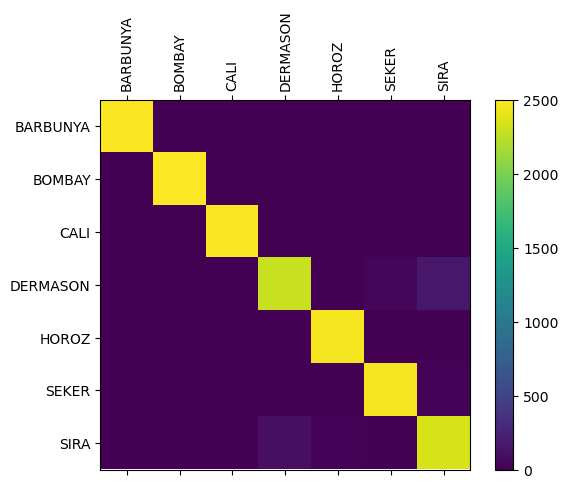

In [87]:
fig, ax = plt.subplots()

mat = ax.matshow(conf_mat)

#set tick positions
xticks_positions = np.arange(len(class_names))
yticks_positions = np.arange(len(class_names))

# set tick labels
ax.set_xticks(xticks_positions)
ax.set_yticks(yticks_positions)

# set tick labels using fixedlocator and fixedformater
ax.set_xticklabels(class_names, rotation=90)
ax.set_yticklabels(class_names)

plt.colorbar(mat)
plt.show()

The Random forest classifier was able to resolve the missclassification between `CALI` and `BARBUNYA`(their boxes are significantly more yellow). However, the confusion between `SIRA` and `DERMASON`(their diagonal boxes are still somewhat greenish) persists. 

In [91]:
# for a better view, let's focus on the missclassification 
row_sums = conf_mat.sum(axis=1, keepdims=True)
norm_conf_mat = conf_mat / row_sums 
np.fill_diagonal(norm_conf_mat, 0)


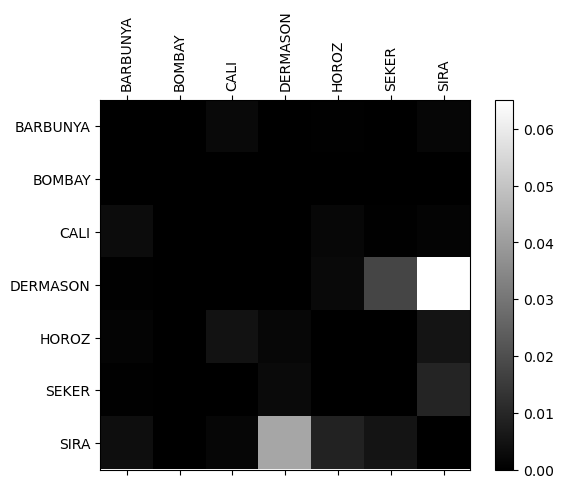

In [93]:
fig, ax = plt.subplots()

mat = ax.matshow(norm_conf_mat, cmap=plt.cm.gray) # for better comparison of errors, use binary. 

#set tick positions
xticks_positions = np.arange(len(class_names))
yticks_positions = np.arange(len(class_names))

# set tick labels
ax.set_xticks(xticks_positions)
ax.set_yticks(yticks_positions)

# set tick labels using fixedlocator and fixedformater
ax.set_xticklabels(class_names, rotation=90)
ax.set_yticklabels(class_names)

plt.colorbar(mat)
plt.show()

In [103]:
from sklearn.metrics import classification_report

print( classification_report(y_train_resampled, y_hat_train) ) 

              precision    recall  f1-score   support

    BARBUNYA       0.99      1.00      0.99      2503
      BOMBAY       1.00      1.00      1.00      2503
        CALI       0.99      0.99      0.99      2503
    DERMASON       0.95      0.91      0.93      2503
       HOROZ       0.99      0.99      0.99      2503
       SEKER       0.98      0.99      0.98      2503
        SIRA       0.92      0.94      0.93      2503

    accuracy                           0.97     17521
   macro avg       0.97      0.97      0.97     17521
weighted avg       0.97      0.97      0.97     17521



In [94]:
from sklearn.model_selection import GridSearchCV

param_grid = [ {'n_estimators':[100, 150, 200], 'max_features': [None, 'sqrt'], 
                    'class_weight':[{'BARBUNYA':0.8, 'BOMBAY':0.8, 'CALI':0.8, 'DERMASON': 1, 
                        'HOROZ':0.8, 'SEKER':0.8, 'SIRA':1 }, None] }] #give bigger weights to confused class
gridsearch = GridSearchCV(Rf_clf, param_grid=param_grid, scoring='accuracy', cv=3, return_train_score=True )
gridsearch.fit(X_train_transformed, y_train_resampled)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'class_weight': [{'BARBUNYA': 0.8, 'BOMBAY': 0.8,
                                            'CALI': 0.8, 'DERMASON': 1,
                                            'HOROZ': 0.8, 'SEKER': 0.8,
                                            'SIRA': 1},
                                           None],
                          'max_features': [None, 'sqrt'],
                          'n_estimators': [100, 150, 200]}],
             return_train_score=True, scoring='accuracy')

In [96]:
gridsearch.best_params_ 

{'class_weight': None, 'max_features': 'sqrt', 'n_estimators': 100}

PCA is sensitive to the scale of the features because it aims to identify the directions of maximum variance in the data. If the features have different scales, PCA may place more emphasis on the features with larger scales, potentially leading to biased results. By scaling the features before applying PCA, you ensure that all features contribute equally to the analysis, regardless of their original scales.

In [105]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline( [ ('scaler', StandardScaler()), 
             ('pca', PCA(n_components=5) ), 
             ('classifier', RandomForestClassifier())] )

In [106]:
pipeline.fit(X_train_resampled, y_train_resampled)
y_pred = pipeline.predict(X_test)

accuracy = pipeline.score(X_test, y_test)
accuracy

0.9218903036238981

In [108]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

    BARBUNYA       0.93      0.91      0.92       395
      BOMBAY       1.00      1.00      1.00       161
        CALI       0.92      0.94      0.93       479
    DERMASON       0.92      0.90      0.91      1043
       HOROZ       0.96      0.95      0.96       588
       SEKER       0.95      0.95      0.95       619
        SIRA       0.86      0.88      0.87       799

    accuracy                           0.92      4084
   macro avg       0.93      0.93      0.93      4084
weighted avg       0.92      0.92      0.92      4084



In [109]:
conf_mat = confusion_matrix(y_test,  
                            y_pred, 
                            labels=class_names) # Label the confusion matrix
cm_df = pd.DataFrame(conf_mat, index=class_names, columns=class_names)
cm_df

,BARBUNYA,BOMBAY,CALI,DERMASON,HOROZ,SEKER,SIRA
BARBUNYA,359,0,22,0,1,4,9
BOMBAY,0,161,0,0,0,0,0
CALI,18,0,449,0,7,1,4
DERMASON,1,0,0,943,3,21,75
HOROZ,1,0,13,2,559,0,13
SEKER,4,0,0,12,0,588,15
SIRA,3,0,2,72,11,5,706


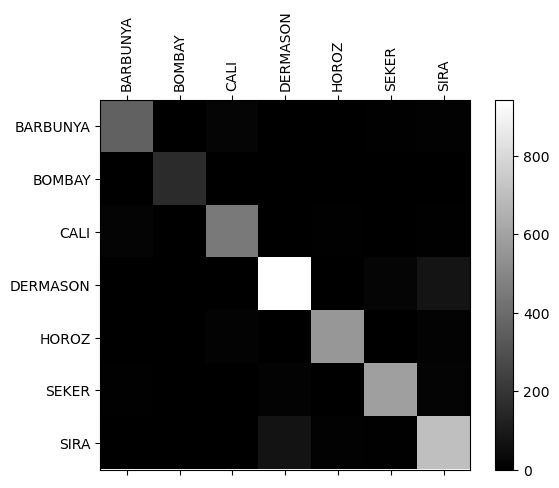

In [111]:
## this doesn't produce an accurate representation of the performance of the model 
## due to class imbalance of the test set. 

fig, ax = plt.subplots()

mat = ax.matshow(conf_mat, cmap=plt.cm.gray)

#set tick positions
xticks_positions = np.arange(len(class_names))
yticks_positions = np.arange(len(class_names))

# set tick labels
ax.set_xticks(xticks_positions)
ax.set_yticks(yticks_positions)

# set tick labels using fixedlocator and fixedformater
ax.set_xticklabels(class_names, rotation=90)
ax.set_yticklabels(class_names)

plt.colorbar(mat)
plt.show()